In [44]:
from matplotlib import pyplot as plt
import numpy as np

In [45]:
# these values are taken from the reports in https://www.wiki.ed.ac.uk/display/nnpdfwiki/Correlated+replica+method
alphas_vals = [0.114, 0.115, 0.116, 0.117, 0.118, 0.120, 0.121, 0.122]
chi2_vals_nomhou = np.array([1.23660, 1.21182, 1.19229, 1.17828, 1.17088, 1.16808, 1.17629, 1.18816])*4616
chi2_vals_mhou_no_mhou_in_chi2 = np.array([1.53383, 1.40699, 1.31657, 1.25304, 1.19656, 1.17481, 1.20506, 1.24288])*4616
chi2_vals_mhou = np.array([1.14072, 1.13531, 1.13415, 1.13284, 1.13284, 1.14041, 1.14687, 1.15696])*4616
chi2_vals_nomhou_t0 = np.array([1.36499, 1.32461, 1.29032, 1.26267, 1.24227, 1.21517, 1.21116, 1.21669])*4616

In [46]:
mhou_to_plot = None
nomhou_to_plot = chi2_vals_nomhou_t0

In [47]:
if mhou_to_plot is not None:
    poly_mhou = np.polyfit(alphas_vals, mhou_to_plot, 2)
if nomhou_to_plot is not None:
    poly_nomhou = np.polyfit(alphas_vals, nomhou_to_plot, 2)

In [48]:
alphas_finegrid = np.linspace(alphas_vals[0], alphas_vals[-1])
poly_mhou_finegrid = poly_mhou[0]*alphas_finegrid**2+poly_mhou[1]*alphas_finegrid+poly_mhou[2]
poly_nomhou_finegrid = poly_nomhou[0]*alphas_finegrid**2+poly_nomhou[1]*alphas_finegrid+poly_nomhou[2]
min_mhou = -poly_mhou[1] / 2 / poly_mhou[0]
min_nomhou = -poly_nomhou[1] / 2 / poly_nomhou[0]
delta_chi2_mhou = 1/np.sqrt(poly_mhou[0])
delta_chi2_nomhou = 1/np.sqrt(poly_nomhou[0])

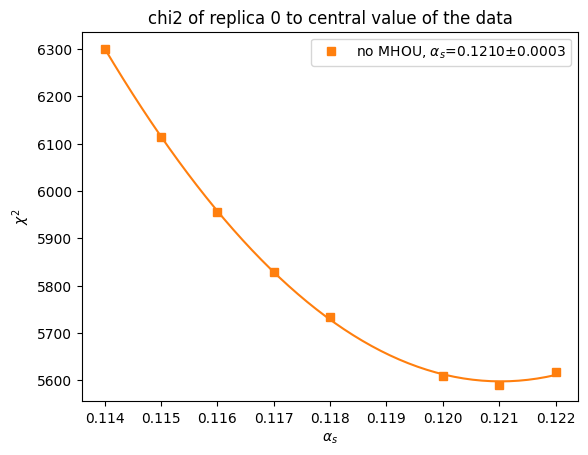

In [49]:
if mhou_to_plot is not None:
    plt.plot(alphas_vals, mhou_to_plot, 's', color="C0", linewidth=20, label=fr"MHOU, $\alpha_s$={min_mhou:.4f}$\pm${delta_chi2_mhou:.4f}")
    plt.plot(alphas_finegrid, poly_mhou_finegrid, color="C0")
if nomhou_to_plot is not None:
    plt.plot(alphas_vals, nomhou_to_plot, 's', color="C1", linewidth=20, label=fr"no MHOU, $\alpha_s$={min_nomhou:.4f}$\pm${delta_chi2_nomhou:.4f}")
    plt.plot(alphas_finegrid, poly_nomhou_finegrid, color="C1")
plt.title("chi2 of replica 0 to central value of the data")
plt.ylabel(r"$\chi^2$")
plt.xlabel(r"$\alpha_s$")
plt.legend()